In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats
import os

In [2]:
# Load datasets
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202102.GLO.RL06M.MSCNv02CRI.nc")
# catalog = pd.read_csv('eq_200204_202102.csv')
# catalog["time"] = catalog["time"].astype("datetime64")
catalog = pd.read_csv(dataset_path + 'ind_and_bg_probs.csv')
catalog["time"] = catalog["time"].astype("datetime64")

In [3]:
def get_mass(eq):
    mass_change = ds.sel(lat=(eq["latitude"]),lon=(eq["longitude"]),time=(eq["time"]), method="nearest")
    mass_change = mass_change["lwe_thickness"]
    return mass_change.data
  
catalog['dmass'] = catalog.apply(lambda row: get_mass(row), axis=1)

In [4]:
# catalog['on_land'] = globe.is_land(catalog.latitude, catalog.longitude)

In [5]:
def plot_hist(all_time_periods, earthquake_only, ax1, ax2, title1, title2):
    
    # Cumulative histogram

    bins = np.linspace(-80,80,41)
    ax1.hist(earthquake_only, bins, density = True, cumulative=True, histtype='step',
            label='Time periods with an earthquake',linewidth=1.5)
    ax1.hist(all_time_periods, bins, density = True, cumulative=True,histtype='step',
            label='All time periods',linewidth=1.5)
    ax1.set_ylim((-0.1,1.3))
    ax1.legend()
    ax1.set_xlabel('Surface load (cm water equiv.)', fontsize = 17)
    ax1.set_ylabel("Cumulative probability", fontsize = 17)
    ax1.set_title(title1)
    
    # Non-cumulative histogram

    ax2.hist(earthquake_only, bins, density = True, cumulative=False, histtype='step',
            label='Time periods with an earthquake',linewidth=1.5)
    ax2.hist(all_time_periods, bins, density = True, cumulative=False,histtype='step',
            label='All time periods',linewidth=1.5)
    yl = ax2.get_ylim()
    ax2.set_ylim((-0.01,1.4*yl[1]))
    ax2.set_xlim((-40,60))
    ax2.legend()
    ax2.set_xlabel('Surface load (cm water equiv.)', fontsize = 17)
    ax2.set_ylabel("Probability", fontsize = 17)
    ax2.set_title(title2)

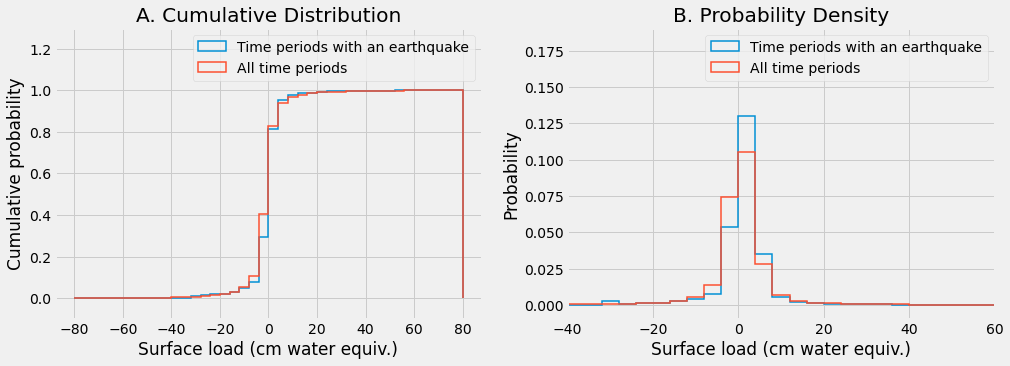

In [369]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plt.style.use('fivethirtyeight')

plot_hist(np.array(ds['lwe_thickness'].data.flatten()), np.array(catalog.dmass), ax1, ax2, 
              'A. Cumulative Distribution', 'B. Probability Density')

In [7]:
def calc_stats(a,b):
    '''
    Calculate stats for the distributions a and b
    a: distribution during earthquakes
    b: distribution over all time periods
    '''
    
    result = {} # this creates a dictionary
    
    result['cvm'] = stats.cramervonmises_2samp(a, b, method='auto')
    result['ks'] = stats.ks_2samp(a, b)
    result['median_all'] = np.median(b)
    result['median_eq'] = np.median(a)
    result['mean_all'] = np.mean(b)
    result['mean_eq'] = np.mean(a)
    result['mean_all_minus_mean_eq'] = np.mean(b)-np.mean(a)
    result['median_all_minus_median_eq'] = np.median(b)-np.median(a)
    
    return result

## Using Bayes' Theorem:

In [368]:
# Relative probability of earthquake given loading

def plot_rel_hist(all_time_periods, earthquake_only, ax, title):
    
    bins = np.linspace(-80,80,41)
    LgE = np.histogram(earthquake_only, bins=bins, density = True)[0]
    L   = np.histogram(all_time_periods,bins=bins, density = True)[0]

    wid = np.mean(np.diff(bins))
    ax.bar(bins[:-1]+wid/2,LgE/L,width=wid)

    ax.plot([-80,80],[1, 1],'--r')
    ax.text(-20, 1.5,'P=P(E)',color='r',fontsize=20)
    ax.set_xlabel('Surface Load (cm water equiv.)',fontsize = 17)
    ax.set_ylabel('Relative Probability',fontsize = 17)
    ax.set_title(title, fontsize = 17)
    return fig,ax


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Relative Probability Of Earthquake'}, xlabel='Surface Load (cm water equiv.)', ylabel='Relative Probability'>)

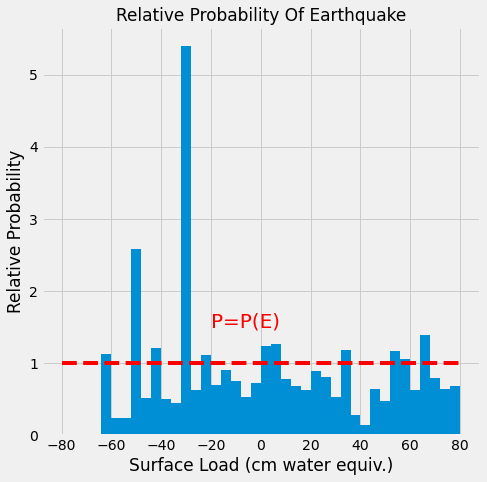

In [9]:
fig,ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')
plot_rel_hist(np.array(ds['lwe_thickness'].data.flatten()), np.array(catalog.dmass), ax, 
              "Relative Probability Of Earthquake")

In [ ]:
calc_stats(np.array(catalog.dmass),np.array(ds['lwe_thickness'].data.flatten()))

## Correlation between reconstructed D values and seismic activity


In [ ]:
# Loading D values from pca grace

D_eq_values = []
for filenumber in np.arange(1,7):
    filename = os.path.join('/data/fast1/surface-load/pca/','D_eq_%d.csv'%filenumber)
    D_eq_values.append( np.loadtxt(filename, delimiter=',') )
    # asumes filenames like 'D_eq_values_1.csv', 'D_eq_values_2.csv', and so on

D_values = []
for filenumber in np.arange(1,7):
    filename = os.path.join('/data/fast1/surface-load/pca/','D_%d.csv'%filenumber)
    D_values.append( np.loadtxt(filename, delimiter=',') )

In [381]:
D_values[3]

array([[-0.14099031,  0.01740897,  0.29452759, ..., -0.37554614,
        -0.40261702, -0.21397624],
       [-0.14099031,  0.01740897,  0.29452759, ..., -0.37554614,
        -0.40261702, -0.21397624],
       [-0.14099031,  0.01740897,  0.29452759, ..., -0.37554614,
        -0.40261702, -0.21397624],
       ...,
       [-0.44982111,  0.05554229,  0.93967256, ..., -1.19815734,
        -1.28452538, -0.6826783 ],
       [-0.44982111,  0.05554229,  0.93967256, ..., -1.19815734,
        -1.28452538, -0.6826783 ],
       [-0.44982111,  0.05554229,  0.93967256, ..., -1.19815734,
        -1.28452538, -0.6826783 ]])

In [ ]:
stats = []

for i in range(6):
    stats.append(calc_stats(D_eq_values[i], D_values[i]))

pd.DataFrame(stats)


## Correlation between detrended D values and seismic activity

In [26]:
# Loading detrended data

D_detrend_eq_values = []
for filenumber in np.arange(1,7):
    D_detrend_eq_values.append( np.loadtxt('D_detrend_eq_%d.csv'%filenumber, delimiter=',') )

D_detrend_values = []
for filenumber in np.arange(1,7):
    D_detrend_values.append( np.loadtxt('D_detrend_%d.csv'%filenumber, delimiter=',') )

In [29]:
D_detrend_values[1]

array([[-0.24389828, -0.24098377,  0.13128741, ...,  0.10751991,
        -0.01900568, -0.09380543],
       [-0.24389828, -0.24098377,  0.13128741, ...,  0.10751991,
        -0.01900568, -0.09380543],
       [-0.24389828, -0.24098377,  0.13128741, ...,  0.10751991,
        -0.01900568, -0.09380543],
       ...,
       [-1.65856852, -1.63874914,  0.89278681, ...,  0.73116197,
        -0.12924334, -0.63790006],
       [-1.65856852, -1.63874914,  0.89278681, ...,  0.73116197,
        -0.12924334, -0.63790006],
       [-1.65856852, -1.63874914,  0.89278681, ...,  0.73116197,
        -0.12924334, -0.63790006]])

In [ ]:
stats_detrend = []

for i in range(6):
    stats_detrend.append(calc_stats(D_detrend_eq_values[i], D_detrend_values[i]))

In [ ]:
stats_detrend

## Maps 

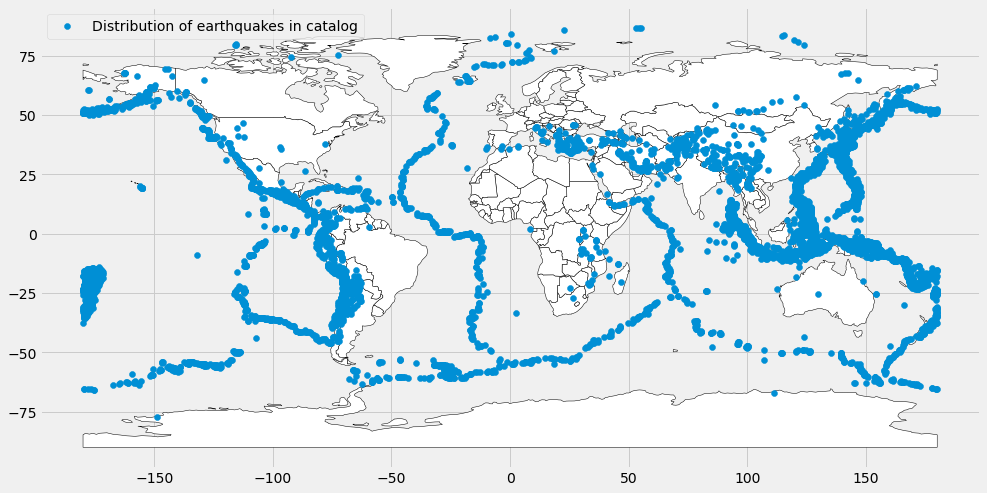

In [11]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(catalog.longitude, catalog.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(color='white', edgecolor='black', figsize=(8,6))
ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
gdf.plot(ax=ax, label='Distribution of earthquakes in catalog')
leg = ax.legend()

# gdi = gpd.GeoDataFrame(df_ind, geometry=gpd.points_from_xy(df_ind.longitude, df_ind.latitude))
# gdi.plot(ax=ax, markersize = 5)

# plt.show()

In [363]:
# # function to plot maps of earthquake distribution

# # def plot_map(thr, earthquake_only):
    
# #     df_bigmass = catalog[np.abs(earthquake_only) > thr]
# #     gdf = gpd.GeoDataFrame(df_bigmass,
# #                            geometry=gpd.points_from_xy(df_bigmass.longitude, 
# #                                                    df_bigmass.latitude))

# #     world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# #     ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
# #     gdf.plot(ax=ax, label='All earthquakes that occured at surface load > 25')
# #     leg = ax.legend()
# #     ax.set_xlabel('Longitude', fontsize = 15)
# #     ax.set_ylabel("Latitude", fontsize = 15)
# #     plt.show()

# def plot_map(earthquake_only, mass_bounds, label):
    
#     world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#     ax = world.plot(color='white', edgecolor='black', figsize=(15,10))
    
#     df_bigmass = mass_bounds
#     gdf = gpd.GeoDataFrame(df_bigmass,
#                         geometry=gpd.points_from_xy(df_bigmass.longitude, df_bigmass.latitude))

#     gdf.plot(ax=ax, label=label)
#     leg = ax.legend()
#     ax.set_xlabel('Longitude', fontsize = 15)
#     ax.set_ylabel("Latitude", fontsize = 15)
#     plt.show()
    
# # def plot_same_map(eq_load1, eq_load2, bigmass1, bigmass2, label1, label2):

# #     world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# #     ax = world.plot(color='white', edgecolor='black', figsize=(15,10))

# #     # first PC
# #     df_bigmass = bigmass1
# #     gdf = gpd.GeoDataFrame(df_bigmass,
# #                        geometry=gpd.points_from_xy(df_bigmass.longitude, df_bigmass.latitude))
# #     gdf.plot(ax=ax, label=label1)


def plot_map(eq_load1, bigmass1, label1):

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(color='white', edgecolor='black', figsize=(15,10))

    # first PC
    df_bigmass = bigmass1
    gdf = gpd.GeoDataFrame(df_bigmass,
                       geometry=gpd.points_from_xy(df_bigmass.longitude, df_bigmass.latitude))
    gdf.plot(ax=ax, label=label1)


#     # second pc
#     df_bigmass = bigmass2
#     gdf = gpd.GeoDataFrame(df_bigmass,
#                        geometry=gpd.points_from_xy(df_bigmass.longitude, df_bigmass.latitude))
#     gdf.plot(ax=ax, label=label2)


    leg = ax.legend()
    ax.set_xlabel('Longitude', fontsize = 15)
    ax.set_ylabel("Latitude", fontsize = 15)
    plt.show()

AttributeError: 'Series' object has no attribute 'longitude'

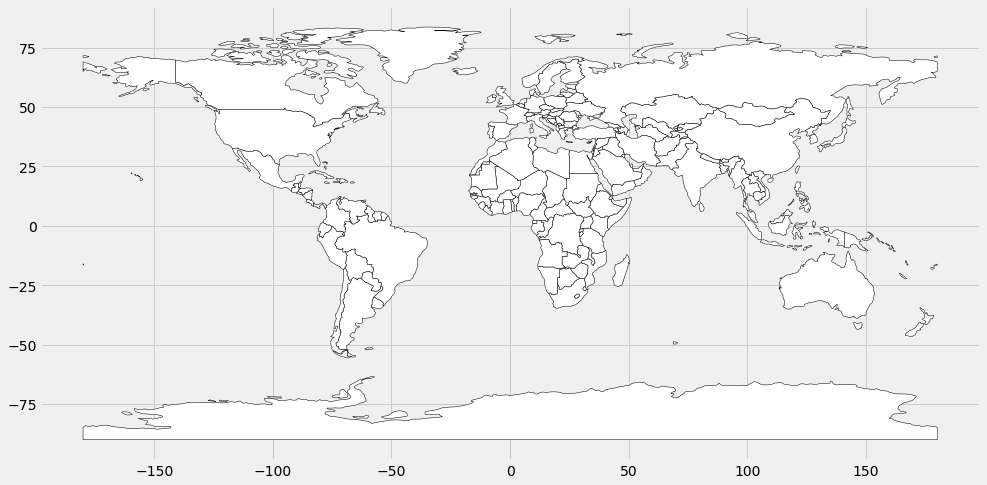

In [364]:
plot_map(catalog['dmass'], catalog['dmass'] > 25,"uuu")

### Maps for not detrended analyses

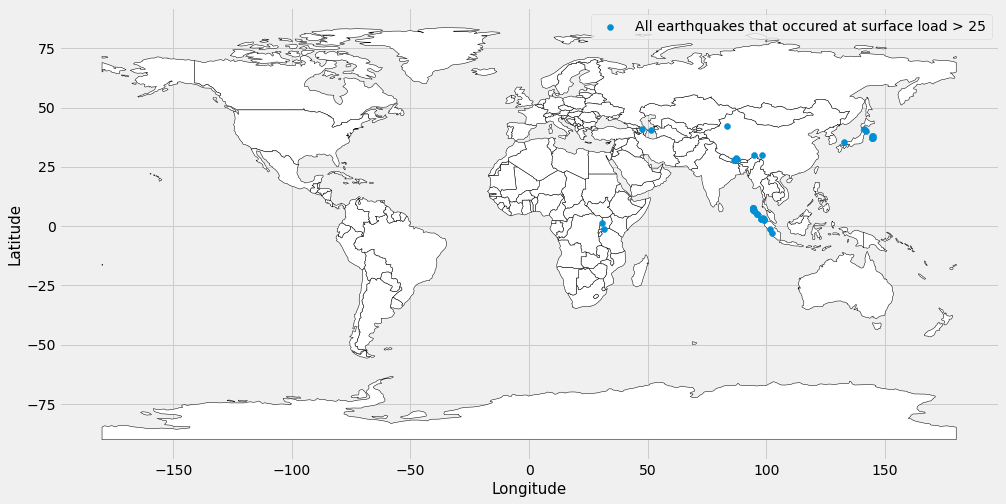

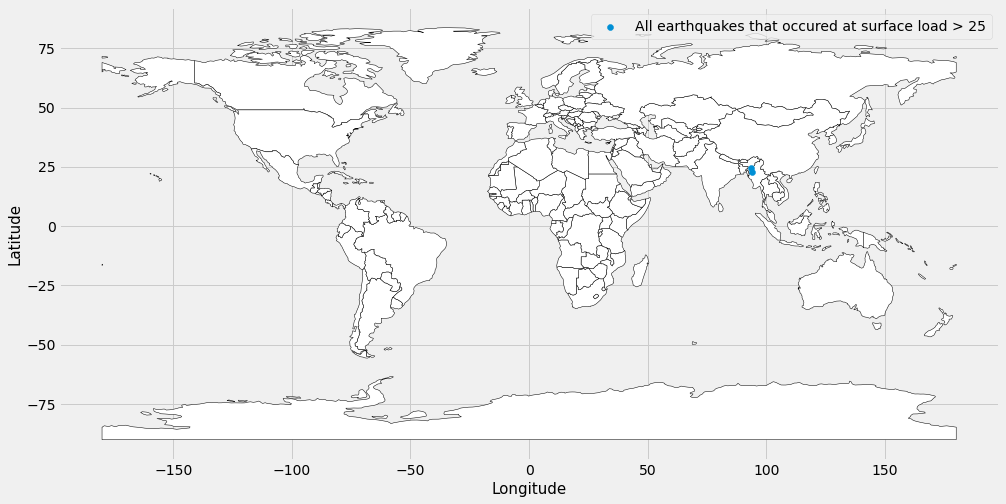

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


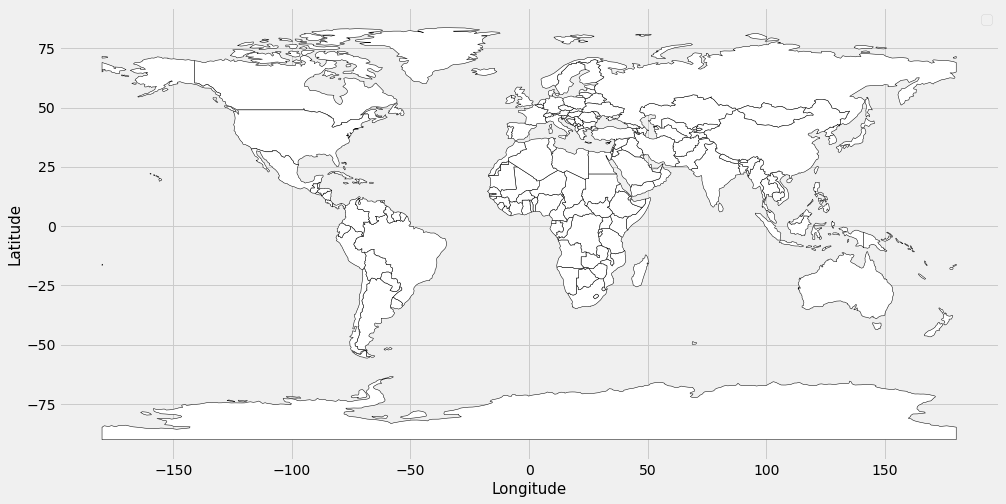

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


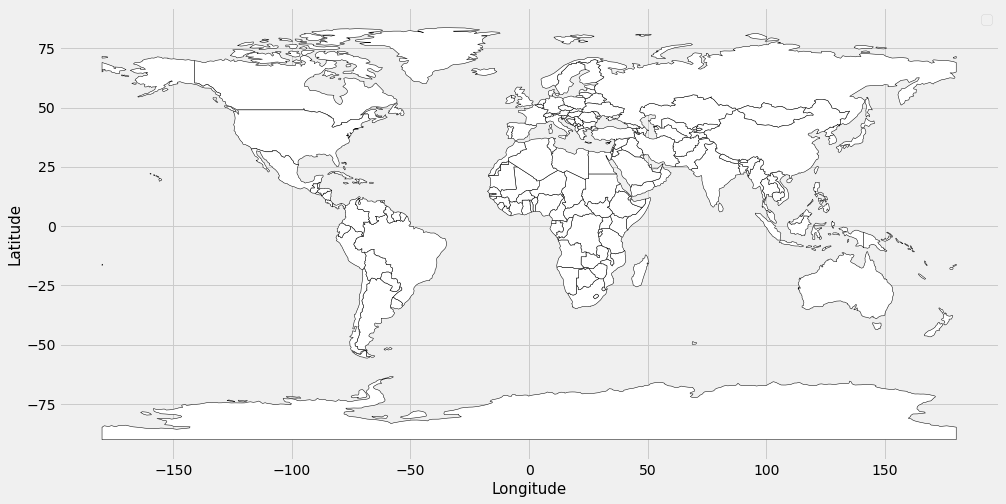

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


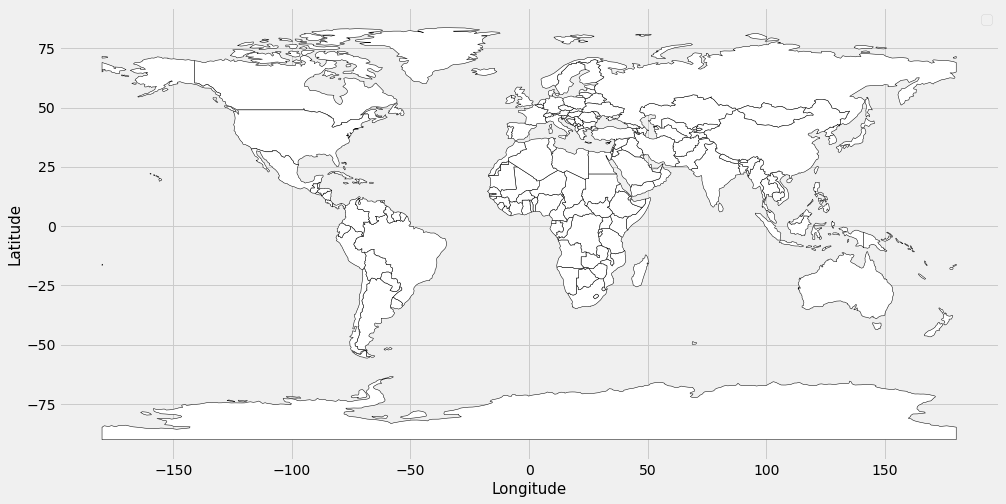

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


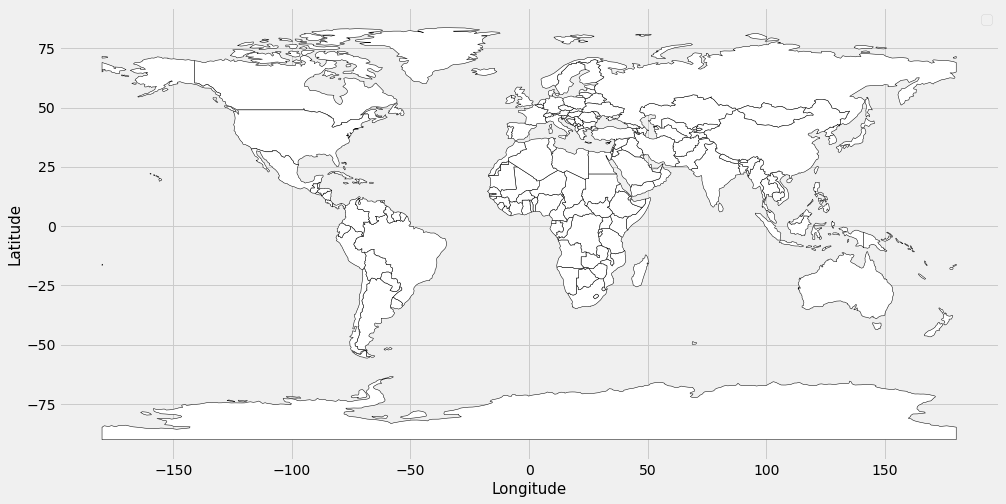

In [32]:
for i in range(6):
    plot_map(25, D_eq_values[i])

### Maps for detrended analyses

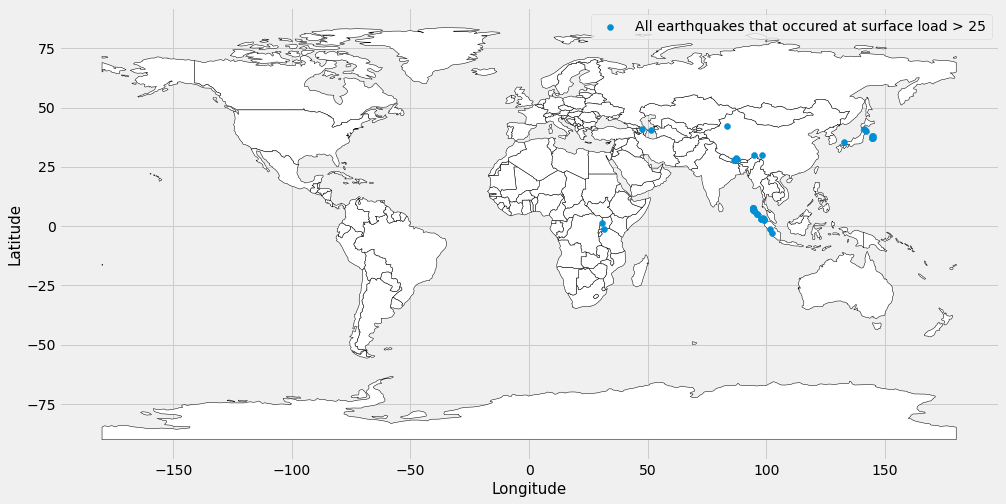

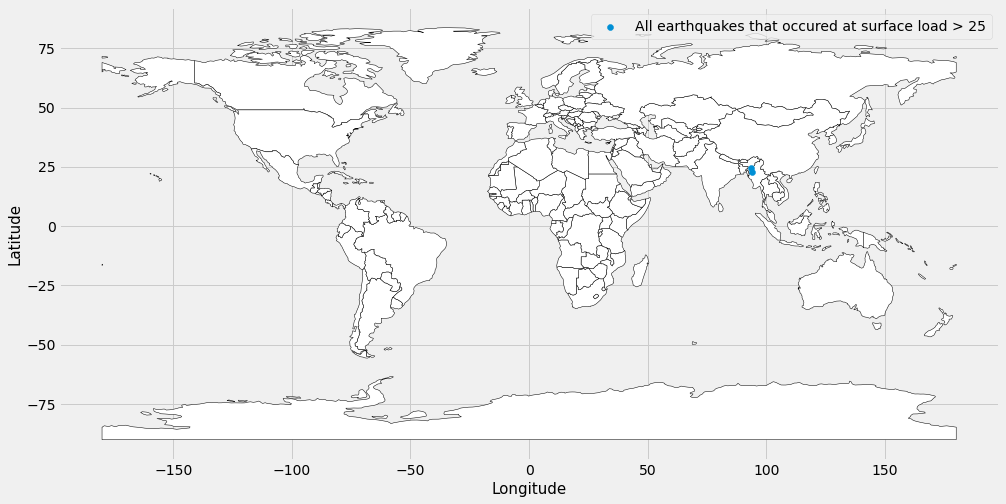

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


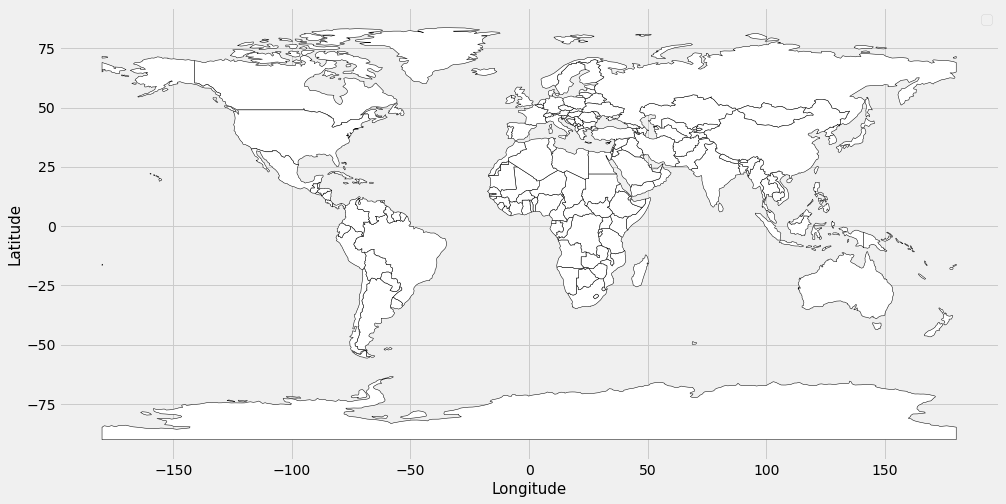

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


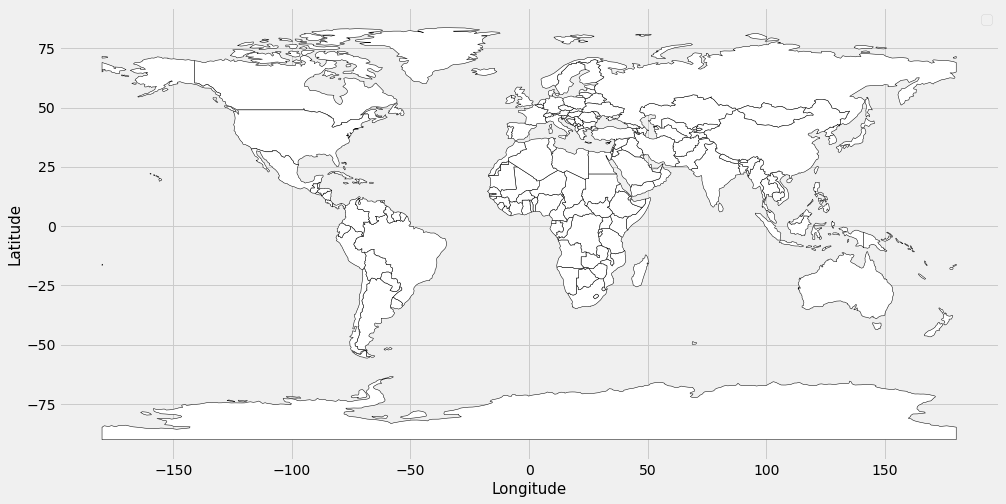

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


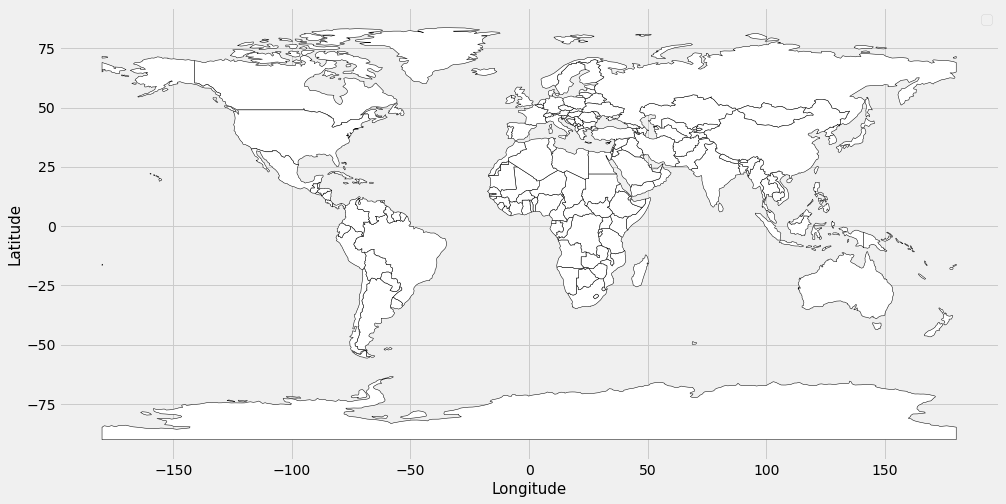

/home/amand4/.local/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


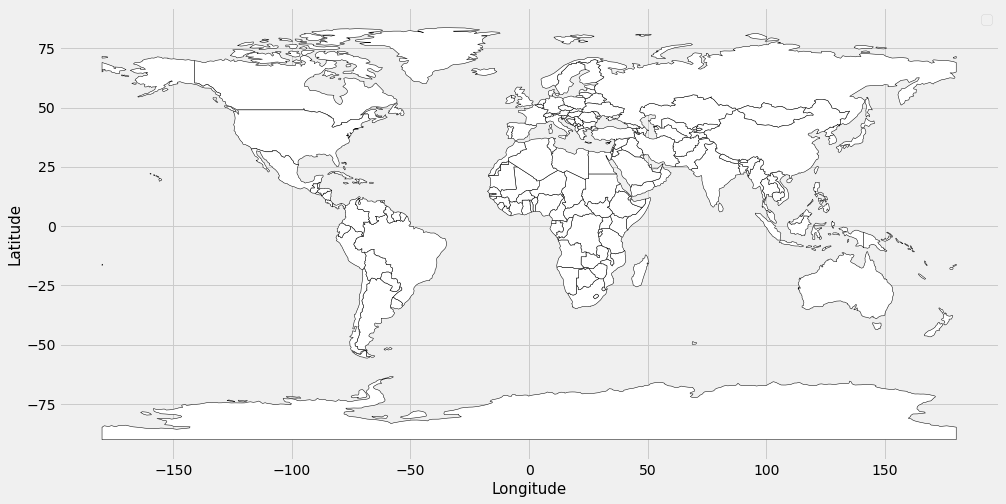

In [33]:
for i in range(6):
    plot_map(25, D_detrend_eq_values[i])

### Plotting all PCs on the same map

In [365]:
def plot_same_map(eq_load1, eq_load2, bigmass1, bigmass2, label1, label2):

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(color='white', edgecolor='black', figsize=(15,10))

    # first PC
    df_bigmass = bigmass1
    gdf = gpd.GeoDataFrame(df_bigmass,
                       geometry=gpd.points_from_xy(df_bigmass.longitude, df_bigmass.latitude))
    gdf.plot(ax=ax, label=label1)


    # second pc
    df_bigmass = bigmass2
    gdf = gpd.GeoDataFrame(df_bigmass,
                       geometry=gpd.points_from_xy(df_bigmass.longitude, df_bigmass.latitude))
    gdf.plot(ax=ax, label=label2)


    leg = ax.legend()
    ax.set_xlabel('Longitude', fontsize = 15)
    ax.set_ylabel("Latitude", fontsize = 15)
    plt.show()

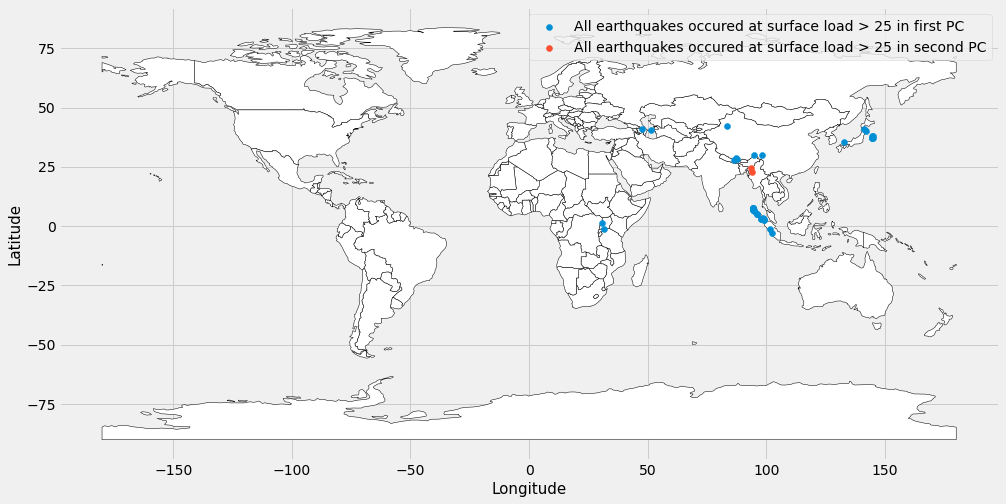

In [366]:
plot_same_map(D_eq_values[0],D_eq_values[1], 
              catalog[np.abs(D_eq_values[0]) > 25],
              catalog[np.abs(D_eq_values[1]) > 25], 
              'All earthquakes occured at surface load > 25 in first PC',
              'All earthquakes occured at surface load > 25 in second PC')

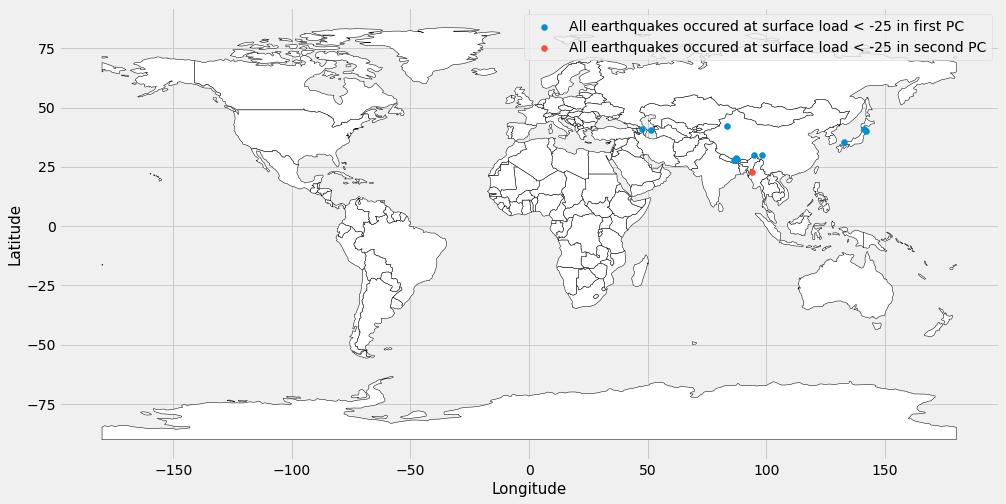

In [36]:
plot_same_map(D_eq_values[0],D_eq_values[1],
               catalog[D_eq_values[0] < -25],
               catalog[D_eq_values[1] < -25],
               'All earthquakes occured at surface load < -25 in first PC',
               'All earthquakes occured at surface load < -25 in second PC')

### Plotting all pcs on the same map for detrended data

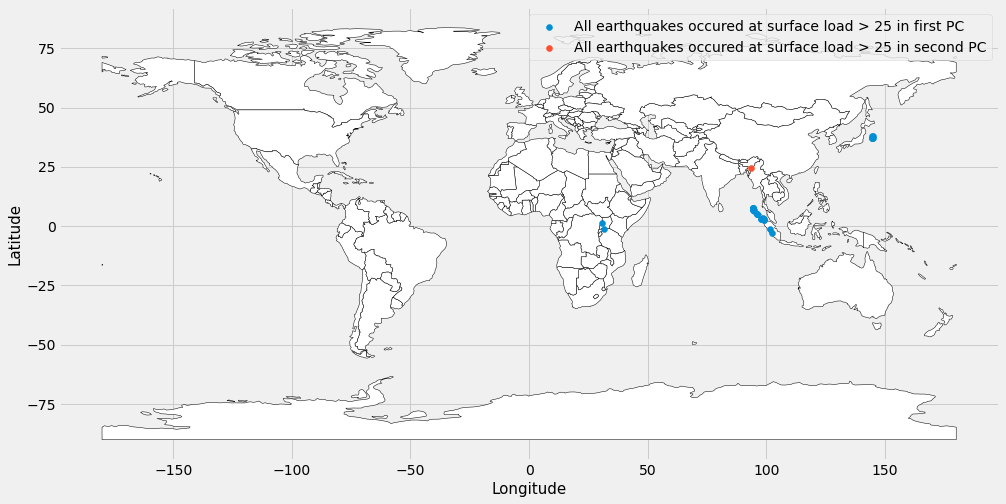

In [37]:
plot_same_map(D_detrend_eq_values[0],D_detrend_eq_values[1],
               catalog[D_detrend_eq_values[0] > 25],
               catalog[D_detrend_eq_values[1] > 25],
              'All earthquakes occured at surface load > 25 in first PC',
              'All earthquakes occured at surface load > 25 in second PC')

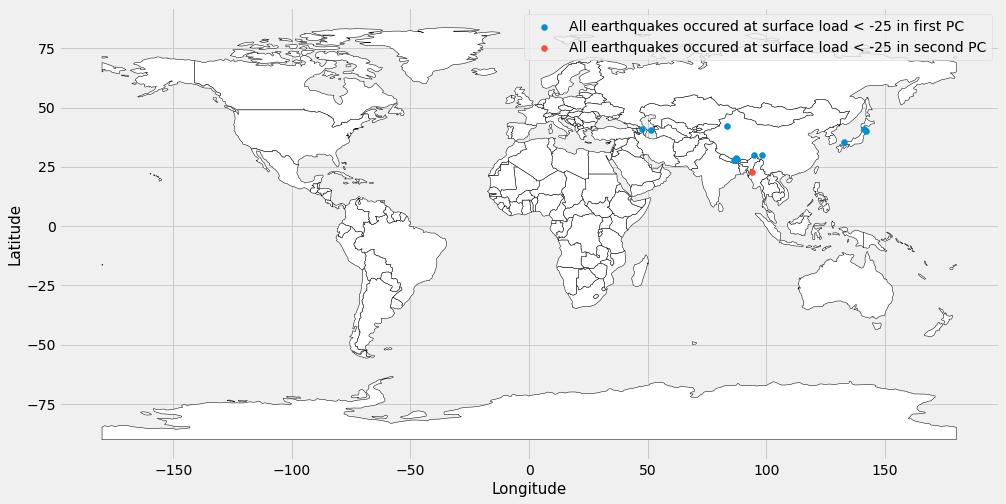

In [38]:
plot_same_map(D_detrend_eq_values[0],D_detrend_eq_values[1],
               catalog[D_detrend_eq_values[0] < -25],
               catalog[D_detrend_eq_values[1] < -25],
               'All earthquakes occured at surface load < -25 in first PC',
               'All earthquakes occured at surface load < -25 in second PC')

## Map of earthquakes with relative probability > 2

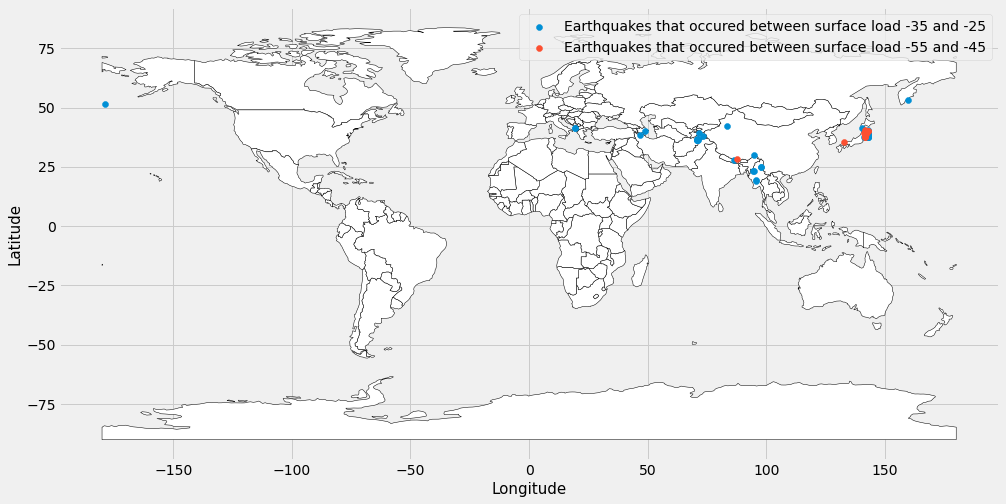

In [39]:
plot_same_map(catalog['dmass'],catalog['dmass'],
             catalog[(-35 < catalog['dmass']) & (catalog['dmass'] < -25)],
             catalog[(-55 < catalog['dmass']) & (catalog['dmass'] < -45)],
             'Earthquakes that occured between surface load -35 and -25',
             'Earthquakes that occured between surface load -55 and -45')

## Figures for poster

In [40]:
def set_of_figures(all_time, earthquake_only):

    fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,5))

    plt.style.use('fivethirtyeight')
    plot_hist(all_time, earthquake_only, ax1, ax2, 
              'A. Cumulative Distribution', 'B. Probability Density')

    plot_rel_hist(all_time, earthquake_only, ax3, 
                  'C. Relative probability of earthquake')

    fig.tight_layout()

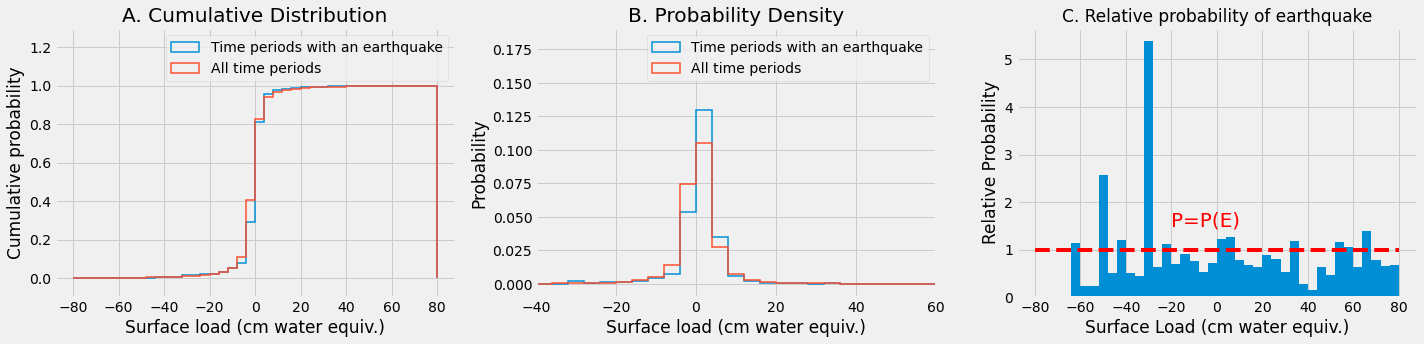

In [41]:
# Main result

set_of_figures(ds['lwe_thickness'].data.flatten(),catalog['dmass'])

<ipython-input-8-09c3742a08c2>:10: RuntimeWarning: invalid value encountered in true_divide
  ax.bar(bins[:-1]+wid/2,LgE/L,width=wid)


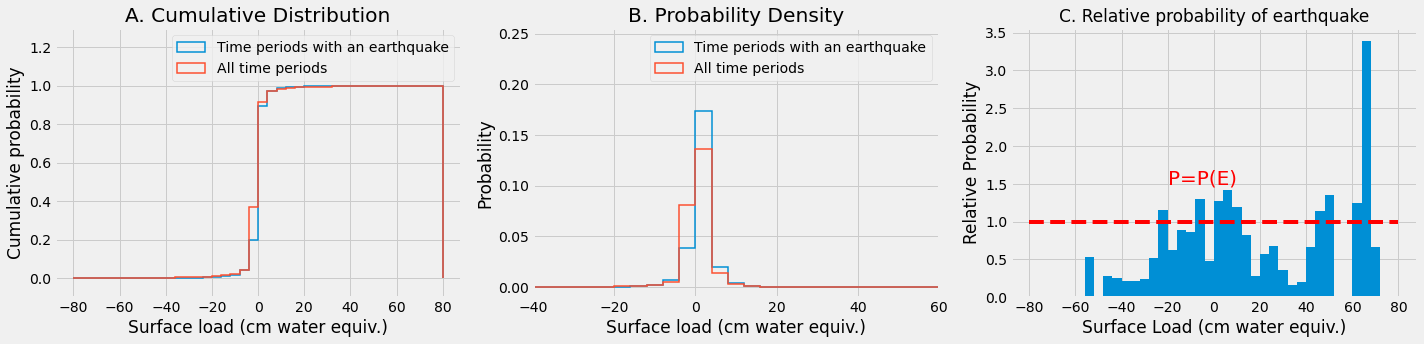

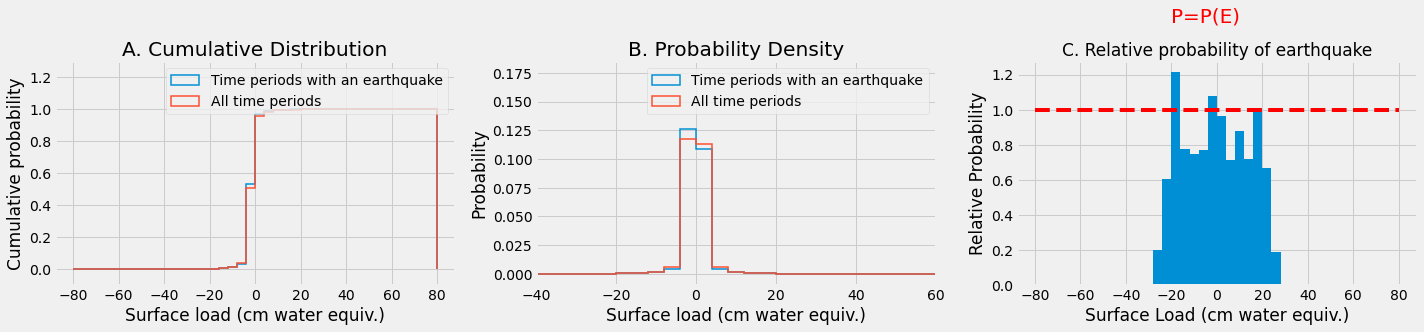

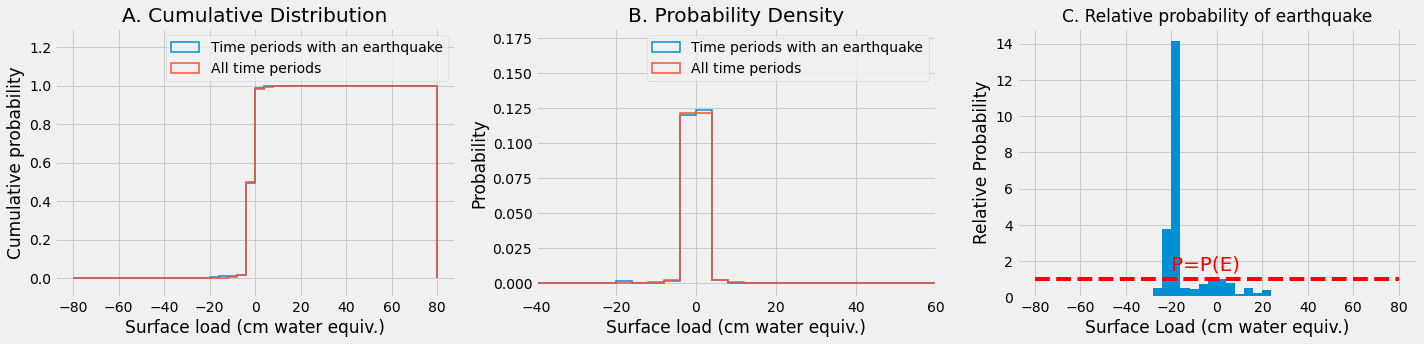

In [42]:
# Correlation using PCs

for i in range(3):
    set_of_figures(D_values[i].flatten(), D_eq_values[i])

<ipython-input-8-09c3742a08c2>:10: RuntimeWarning: invalid value encountered in true_divide
  ax.bar(bins[:-1]+wid/2,LgE/L,width=wid)


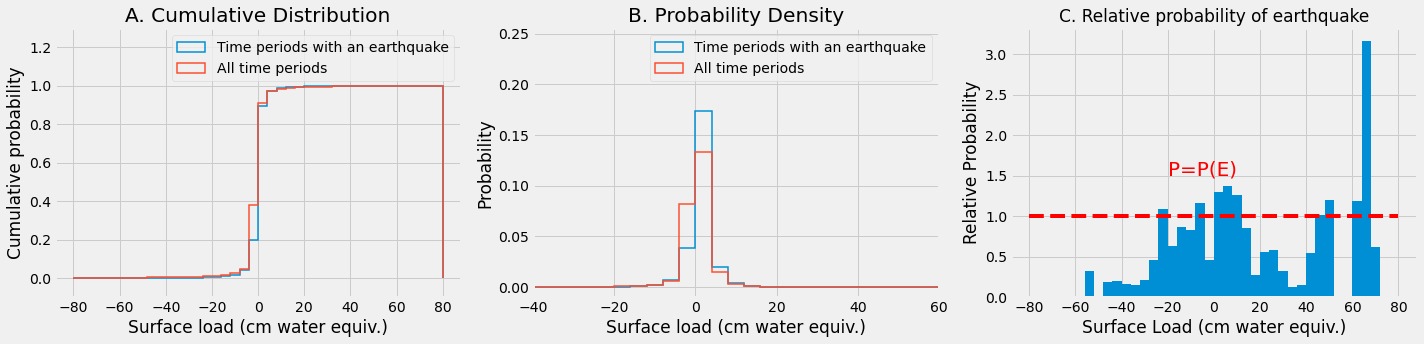

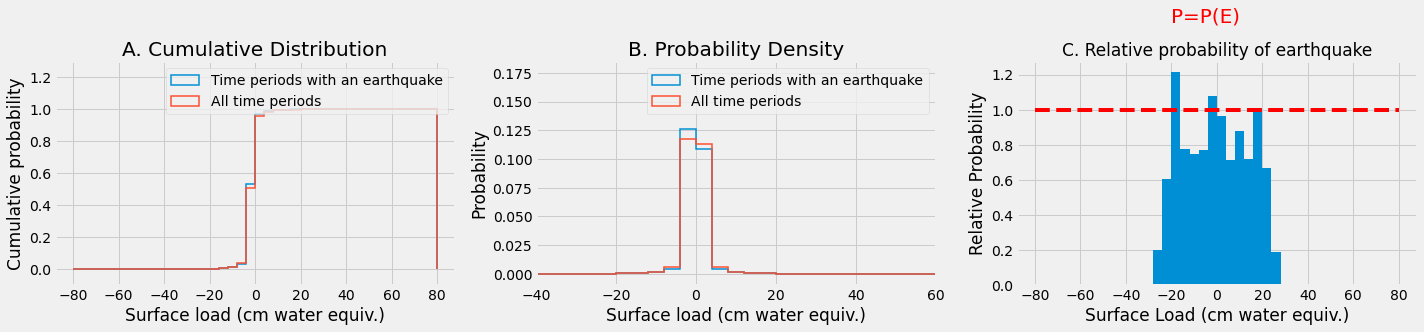

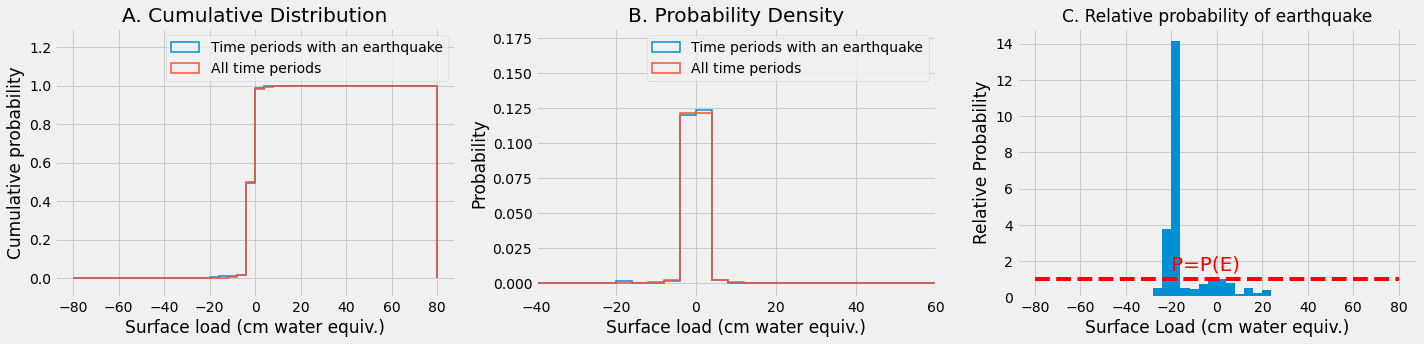

In [43]:
# Detrended PCs

for i in range(3):
    set_of_figures(D_detrend_values[i].flatten(), D_detrend_eq_values[i])

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Relative Probability Of Earthquake'}, xlabel='Surface Load (cm water equiv.)', ylabel='Relative Probability'>)

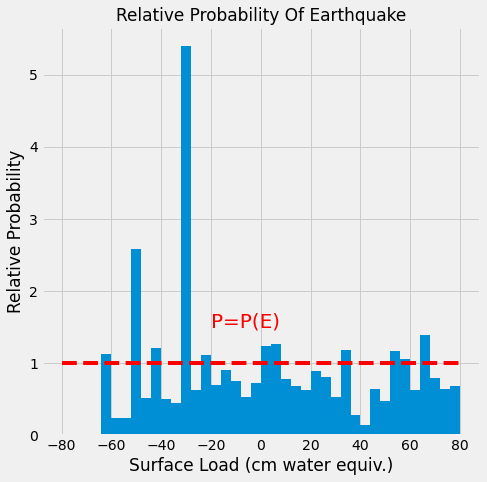

In [44]:
fig,ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')
plot_rel_hist(np.array(ds['lwe_thickness'].data.flatten()), np.array(catalog.dmass), ax, 
              "Relative Probability Of Earthquake")

# def plot_rel_hist(all_time_periods, earthquake_only, ax, title):
    
#     bins = np.linspace(-80,80,41)
#     LgE = np.histogram(earthquake_only, bins=bins, density = True)[0]
#     L   = np.histogram(all_time_periods,bins=bins, density = True)[0]

#     wid = np.mean(np.diff(bins))
#     ax.bar(bins[:-1]+wid/2,LgE/L,width=wid)

#     ax.plot([-80,80],[1, 1],'--r')
#     ax.text(-20, 1.5,'P=P(E)',color='r',fontsize=20)
#     ax.set_xlabel('Surface Load (cm water equiv.)',fontsize = 17)
#     ax.set_ylabel('Relative Probability',fontsize = 17)
#     ax.set_title(title, fontsize = 17)
#     return fig,ax

## Mapping earthquakes with high conditional probability

In [314]:
# 1. Find which bin the load is in

surface_load = np.array(catalog.dmass) # --- loading values during an earthquake
bins = np.linspace(-80,80,41)
which_bin = np.digitize(surface_load,bins)

# 2. Find height of bin

height = LgE/L

# 3. Find loading with conditional probability > 2

high_cond_prob = height[height > 2]

# What is the height of the bin with high conditional probability?

indices = np.where(np.in1d(height, high_cond_prob))[0]

for i in range(len(indices)):
    print(height[indices[i]])
    
# Find height of bin from which_bin --- doesn't work!

Bin_Heights = []

for i in range(2000):
    Bin_Heights.append(height[which_bin[i]])

2.5789768251023255
5.3912656782524495


In [315]:
Bin_Heights

[1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 0.6895062263439343,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 0.6895062263439343,
 0.6895062263439343,
 0.5339512366198292,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.2347562305457591,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 0.7864836178967439,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.2347562305457591,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.263041014507251,
 1.2630410145

In [316]:
# df = pd.DataFrame({'Surface Load': surface_load,
#                    'Corresponding Bin': which_bin,
#                   'Bin Height': Bin_Heights})

# df

In [370]:
LgE/L

array([0.        , 0.        , 0.        , 0.        , 1.13352277,
       0.23648524, 0.23647464, 2.57897683, 0.52119939, 1.20463701,
       0.50259707, 0.44404833, 5.39126568, 0.62689497, 1.11883387,
       0.7000598 , 0.90800564, 0.75954214, 0.53395124, 0.7199558 ,
       1.23475623, 1.26304101, 0.78648362, 0.68950623, 0.62935542,
       0.88989175, 0.80717251, 0.52637317, 1.18846807, 0.28636106,
       0.14592506, 0.63762369, 0.47338093, 1.16543959, 1.06051545,
       0.62674843, 1.39562804, 0.79253745, 0.64820503, 0.68438001])

In [226]:
def high_cond_prob(earthquake_only, all_time_periods, bins):
    
    LgE = np.histogram(earthquake_only, bins=bins, density = True)[0]
    L   = np.histogram(all_time_periods,bins=bins, density = True)[0]
    
    which_bin = np.digitize(earthquake_only,bins)
    height = LgE/L
    high_cond_prob = height[height > 2]
    
    indices = np.where(np.in1d(height, high_cond_prob))[0]
     
    print("Bin number =")
    print(indices)
    
    print("Surface load = ")
    for i in range(len(indices)):
        print("Between")
        print(bins[indices[i-1]])
        print("and")
        print(bins[indices[i-1]+1])
        
    print("Corresponding bin height = ")
    for i in range(len(indices)):
        print(height[indices[i-1]])

In [328]:
np.where(height > 2)

(array([ 7, 12]),)

In [227]:
high_cond_prob(np.array(catalog.dmass),np.array(ds['lwe_thickness'].data.flatten()),bins)

Bin number =
[ 7 12]
Surface load = 
Between
-32.0
and
-28.0
Between
-52.0
and
-48.0
Corresponding bin height = 
5.3912656782524495
2.5789768251023255


0.9460659898477157

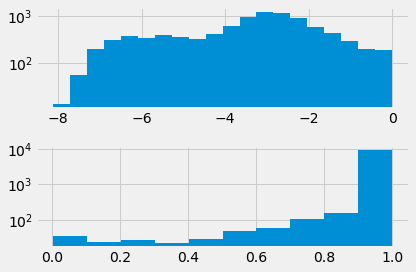

In [360]:
plt.subplots()
plt.subplot(2,1,1)
plt.hist(np.log10(1-catalog['P_triggered'].to_numpy()),20)
plt.yscale('log')

plt.subplot(2,1,2)
plt.hist(catalog['P_triggered'].to_numpy())
plt.yscale('log')

plt.tight_layout()

len(np.where(catalog['P_triggered']>.9)[0])/len(catalog)


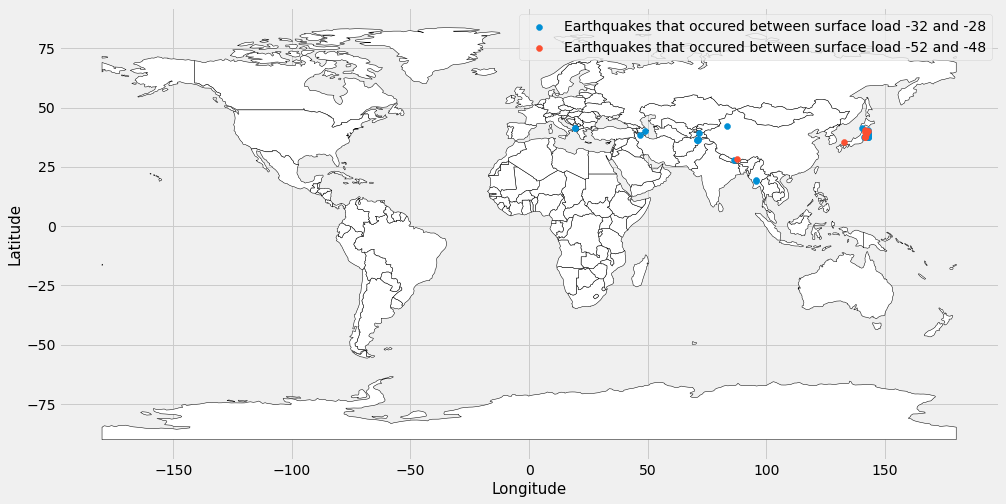

In [232]:
plot_same_map(catalog['dmass'],catalog['dmass'],
             catalog[(-32 < catalog['dmass']) & (catalog['dmass'] < -28)],
             catalog[(-52 < catalog['dmass']) & (catalog['dmass'] < -48)],
             'Earthquakes that occured between surface load -32 and -28',
             'Earthquakes that occured between surface load -52 and -48')

In [233]:
high_cond_prob(D_eq_values[0],D_values[0],bins)

Bin number =
[36]
Surface load = 
Between
64.0
and
68.0
Corresponding bin height = 
3.3910386439639204


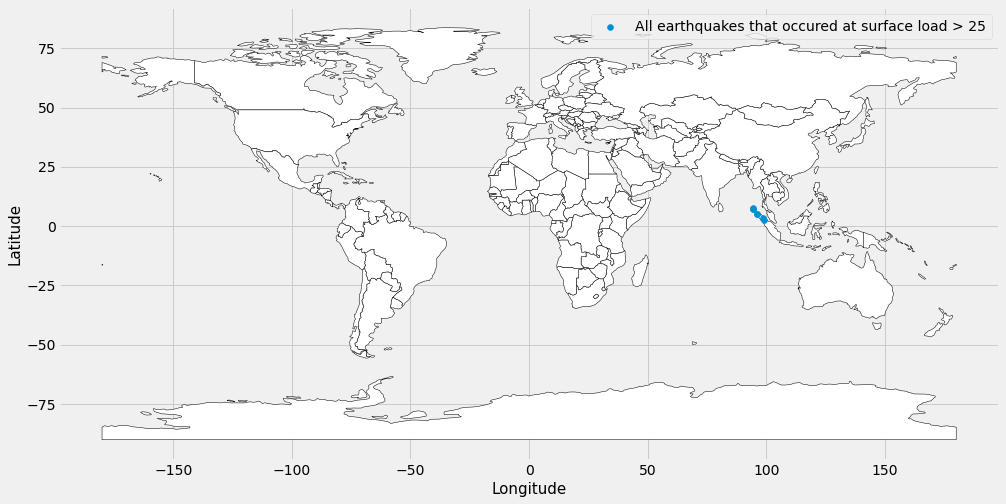

In [234]:
plot_map(64,D_eq_values[0])

40

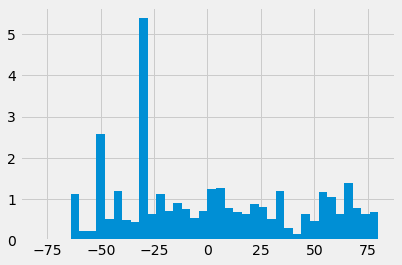

In [98]:
bins = np.linspace(-80,80,41)
LgE = np.histogram(np.array(catalog.dmass), bins=bins, density = True)[0]
L   = np.histogram(np.array(ds['lwe_thickness'].data.flatten()),bins=bins, density = True)[0]

wid = np.mean(np.diff(bins))
plt.bar(bins[:-1]+wid/2,LgE/L,width=wid)